In [2]:
import pandas as pd
import scipy.stats as sts
import numpy as np
from scipy.stats import sem
import matplotlib.pyplot as plt

In [3]:
mouse_metadata = pd.read_csv("../Resources/mouse_metadata.csv")
study_df = pd.read_csv("../Resources/study_results.csv")
study_df.head(1)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0


In [4]:
mouse_metadata.head(1)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16


In [5]:
study_df = study_df.drop_duplicates(subset = ["Mouse ID","Timepoint"], keep="first", inplace = False)

In [6]:
# study_df["Mouse ID"].value_counts()

In [7]:
tumors = study_df["Tumor Volume (mm3)"]
vol_mean = round(np.mean(tumors),2)
vol_median = round(np.median(tumors),2)
vol_var = round(tumors.var(),2)
vol_stdev = round(tumors.std(),2)
vol_sem = round(sem(tumors),2)

print(f"Mean: {vol_mean}")
print(f"Median: {vol_median}")
print(f"Variance: {vol_var}")
print(f"Standard Deviation: {vol_stdev}")
print(f"Standard Error: {vol_sem}")

Mean: 50.45
Median: 48.95
Variance: 79.29
Standard Deviation: 8.9
Standard Error: 0.2


In [28]:
study_merged_df = pd.merge(mouse_metadata,study_df, on = "Mouse ID")
study_merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,25,63.145652,2
1884,z969,Naftisol,Male,9,30,30,65.841013,3
1885,z969,Naftisol,Male,9,30,35,69.176246,4
1886,z969,Naftisol,Male,9,30,40,70.314904,4


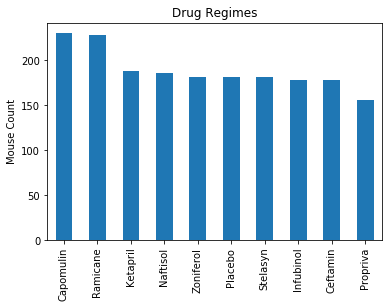

In [23]:
drugs_list = study_merged_df["Drug Regimen"].value_counts()
drugs_plot = drugs_list.plot(kind = "bar")

plt.title("Drug Regimes")
plt.ylabel("Mouse Count")
plt.show()

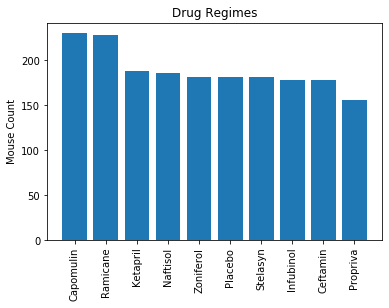

In [24]:
drugs_df = pd.DataFrame(drugs_list)
x_axis = drugs_df.index
y_axis = []

for i in drugs_list:
    y_axis.append(i)

plt.bar(x_axis,y_axis)
plt.title("Drug Regimes")
plt.ylabel("Mouse Count")
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Sex')

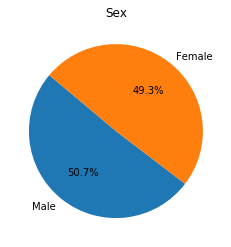

In [56]:
sex_df = study_merged_df["Sex"]
sex_series = sex_df.value_counts()
labels = sex_series.index

sex_plot = plt.pie(sex_series,startangle=140,labels=labels,autopct="%1.1f%%")
plt.title("Sex")

Text(0, 0.5, '')

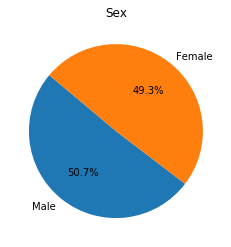

In [64]:
sex_series.plot(kind="pie",startangle=140,autopct="%1.1f%%")
plt.title("Sex")
plt.ylabel('')

In [72]:
Capomulin_tumorvol = study_merged_df.loc[study_merged_df["Drug Regimen"] == "Capomulin","Tumor Volume (mm3)"]
Ramicane_tumorvol = study_merged_df.loc[study_merged_df["Drug Regimen"] == "Ramicane","Tumor Volume (mm3)"]
Infubinol_tumorvol = study_merged_df.loc[study_merged_df["Drug Regimen"] == "Infubinol","Tumor Volume (mm3)"]
Ceftamin_tumorvol = study_merged_df.loc[study_merged_df["Drug Regimen"] == "Ceftamin","Tumor Volume (mm3)"]

In [78]:
cap_quartiles = Capomulin_tumorvol.quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq-cap_lowerq

cap_lower_bound = round(cap_lowerq - (1.5*cap_iqr),2)
cap_upper_bound = round(cap_upperq + (1.5*cap_iqr),2)

print("Capomulin Potential Outliers:")
print(f"Above {cap_upper_bound}, Below {cap_lower_bound}")

Capomulin Potential Outliers:
Above 55.97, Below 26.71
